<a href="https://colab.research.google.com/github/JCSR2022/challenge2-data-science-Alura/blob/main/challenge2_data_science_Alura.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# challenge2-data-science-Alura

Guia para proyecto en:
https://trello.com/b/GieOySjr/challenge-telecomxlatam


estructura sugerida proyecto:https://github.com/ingridcristh/challenge2-data-science-LATAM/blob/main/TelecomX_LATAM.ipynb

al final se debe incluir un informe que debe incluir:

🔹 Introducción: Explica el objetivo del análisis y el problema de evasión de clientes (Churn).

🔹 Limpieza y Tratamiento de Datos: Describe los pasos realizados para importar, limpiar y procesar los datos.

🔹 Análisis Exploratorio de Datos: Presenta los análisis realizados, incluyendo gráficos y visualizaciones para identificar patrones.

🔹 Conclusiones e Insights: Resume los principales hallazgos y cómo estos datos pueden ayudar a reducir la evasión.

🔹 Recomendaciones: Ofrece sugerencias estratégicas basadas en tu análisis.

In [1]:
#librerias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pasos = "challenge2-data-science-Alura\n"

## Extracción de datos

 Los datos están disponibles en formato JSON y contienen información esencial sobre los clientes, incluyendo datos demográficos, tipo de servicio contratado y estado de evasión.

 data opcion1:https://github.com/ingridcristh/challenge2-data-science-LATAM/blob/main/TelecomX_Data.json

data opcion2:'https://github.com/alura-cursos/challenge2-data-science-LATAM/blob/main/TelecomX_Data.json'




In [3]:
# Cargar los datos directamente desde la API utilizando Python.
# Convertir los datos a un DataFrame de Pandas para facilitar su manipulación.
# Este metodo se puede mejorar para carga eficiente vía streaming con ijson para datasets grandes

import requests
import json
import pandas as pd

url_data = "https://raw.githubusercontent.com/alura-cursos/challenge2-data-science-LATAM/main/TelecomX_Data.json"
datos_request = requests.get(url_data)

datos_raw = json.loads(datos_request.text)
df = pd.json_normalize(datos_raw)

print(df.shape)
df.sample(5)

(7267, 21)


,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total
5737,7841-TZDMQ,Yes,Male,0,No,No,2,Yes,No,DSL,...,No,No,No,No,No,Month-to-month,Yes,Credit card (automatic),46.00,84.5
995,1397-XKKWR,No,Male,0,No,No,7,No,No phone service,DSL,...,No,Yes,No,No,No,One year,No,Mailed check,35.30,264.8
3083,4295-YURET,No,Female,1,Yes,Yes,56,Yes,No,DSL,...,No,No,Yes,Yes,Yes,Two year,Yes,Credit card (automatic),72.60,4084.35
4263,5859-HZYLF,No,Male,0,Yes,Yes,26,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Credit card (automatic),19.15,515.75
3177,4438-GGYWL,,Male,0,Yes,Yes,62,Yes,Yes,Fiber optic,...,Yes,Yes,Yes,Yes,Yes,Two year,No,Bank transfer (automatic),115.55,7159.05


In [4]:
import pandas as pd

#en caso de querer trabajar con un archivo muy grande:
#for chunk in pd.read_json(url, lines=True, chunksize=10000):
#    df = pd.json_normalize(chunk.to_dict("records"))


url_data = "https://raw.githubusercontent.com/alura-cursos/challenge2-data-science-LATAM/main/TelecomX_Data.json"

data_raw = pd.read_json(url_data)

data = pd.json_normalize(data_raw.to_dict(orient="records"))

print(data.shape)
data.head()


(7267, 21)


,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


In [5]:
extraccion_pasos = """Extraccion de datos:
Se realizo la la descarga del archivo con pd.read_json y luego se normalizo usando pd.json_normalize.\n"""

In [6]:
pasos+=extraccion_pasos
print(pasos)

challenge2-data-science-Alura
Extraccion de datos:
Se realizo la la descarga del archivo con pd.read_json y luego se normalizo usando pd.json_normalize.



## Exploracion y comprobación de incoherencias en los datos

Explorar las columnas del dataset y verificar sus tipos de datos.
Consultar el diccionario para comprender mejor el significado de las variables.Identificar las columnas más relevantes para el análisis de evasión.

Verificar si hay problemas en los datos que puedan afectar el análisis: alores ausentes, duplicados, errores de formato e inconsistencias en las categorías.

Este proceso es esencial para asegurarte de que los datos estén listos para las siguientes etapas.

Diccionario de datos: https://github.com/ingridcristh/challenge2-data-science-LATAM/blob/main/TelecomX_diccionario.md


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7267 non-null   object 
 1   Churn                      7267 non-null   object 
 2   customer.gender            7267 non-null   object 
 3   customer.SeniorCitizen     7267 non-null   int64  
 4   customer.Partner           7267 non-null   object 
 5   customer.Dependents        7267 non-null   object 
 6   customer.tenure            7267 non-null   int64  
 7   phone.PhoneService         7267 non-null   object 
 8   phone.MultipleLines        7267 non-null   object 
 9   internet.InternetService   7267 non-null   object 
 10  internet.OnlineSecurity    7267 non-null   object 
 11  internet.OnlineBackup      7267 non-null   object 
 12  internet.DeviceProtection  7267 non-null   object 
 13  internet.TechSupport       7267 non-null   objec

### customerID  debe ser un codigo unico


In [8]:
data['customerID'].unique().shape[0], data.shape[0]

(7267, 7267)

### Churn debe tener solo dos valores

In [9]:
data['Churn'].unique()

array(['No', 'Yes', ''], dtype=object)

In [10]:
print(f"Cantidad de valores no definidos {data[data['Churn']==''].shape[0]}")

Cantidad de valores no definidos 224


In [11]:
# Se eliminaran las filas que no aportan informacion
data = data[data['Churn']!='']
print(data.shape[0])

7043


In [12]:
for col in data.columns:
    if data[col].dtype == 'object':
      print(f"Columna: {col}, valores unicos: {data[col].unique()},{data[col].dtype}")
      print()

Columna: customerID, valores unicos: ['0002-ORFBO' '0003-MKNFE' '0004-TLHLJ' ... '9992-UJOEL' '9993-LHIEB'
 '9995-HOTOH'],object

Columna: Churn, valores unicos: ['No' 'Yes'],object

Columna: customer.gender, valores unicos: ['Female' 'Male'],object

Columna: customer.Partner, valores unicos: ['Yes' 'No'],object

Columna: customer.Dependents, valores unicos: ['Yes' 'No'],object

Columna: phone.PhoneService, valores unicos: ['Yes' 'No'],object

Columna: phone.MultipleLines, valores unicos: ['No' 'Yes' 'No phone service'],object

Columna: internet.InternetService, valores unicos: ['DSL' 'Fiber optic' 'No'],object

Columna: internet.OnlineSecurity, valores unicos: ['No' 'Yes' 'No internet service'],object

Columna: internet.OnlineBackup, valores unicos: ['Yes' 'No' 'No internet service'],object

Columna: internet.DeviceProtection, valores unicos: ['No' 'Yes' 'No internet service'],object

Columna: internet.TechSupport, valores unicos: ['Yes' 'No' 'No internet service'],object

Columna: in

In [13]:
for col in data.columns:
    if data[col].dtype != 'object':
      print(f"Columna: {col}, valores unicos: {data[col].unique()},{data[col].dtype}")
      print()

Columna: customer.SeniorCitizen, valores unicos: [0 1],int64

Columna: customer.tenure, valores unicos: [ 9  4 13  3 71 63  7 65 54 72  5 56 34  1 45 50 23 55 26 69 37 49 66 67
 20 43 59 12 27  2 25 29 14 35 64 39 40 11  6 30 70 57 58 16 32 33 10 21
 61 15 44 22 24 19 47 62 46 52  8 60 48 28 41 53 68 31 36 17 18 51 38 42
  0],int64

Columna: account.Charges.Monthly, valores unicos: [65.6  59.9  73.9  ... 91.75 68.8  67.85],float64



In [14]:
# la funcion data['account.Charges.Total'].astype(float) da problemas debido a que hay valores vacios

tmp = pd.to_numeric(data['account.Charges.Total'], errors='coerce')
n_invalid = tmp.isna().sum()
print(f"Filas no convertibles: {n_invalid}")
data[data['account.Charges.Total'].astype(str).str.strip() == ""].head(3)

Filas no convertibles: 11


,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total
975,1371-DWPAZ,No,Female,0,Yes,Yes,0,No,No phone service,DSL,...,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,
1775,2520-SGTTA,No,Female,0,Yes,Yes,0,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,
1955,2775-SEFEE,No,Male,0,No,Yes,0,Yes,Yes,DSL,...,Yes,No,Yes,No,No,Two year,Yes,Bank transfer (automatic),61.90,


In [15]:
# Conversion a float de valores validos
data.loc[:,'account.Charges.Total'] = pd.to_numeric(data['account.Charges.Total'],errors='coerce')


In [16]:
#los 11 espacios vacios quedan como valores Nan
data.isna().sum().sum()

np.int64(11)

In [17]:
#eliminacion de las filas con valores nan
data = data.dropna()
data.isna().sum().sum()

np.int64(0)

In [18]:
#por algun motivo la columna no se convirtio al formato float,
# posiblemente el proceso normalize crea el df con columnas tipo contenedor
data.loc[:,'account.Charges.Total'].dtype

dtype('O')

In [19]:
#se procede a forzar recast del dtype

data['account.Charges.Total'] = pd.Series(data['account.Charges.Total'].values, dtype="float64")
data.loc[:,'account.Charges.Total'].dtype

dtype('float64')

In [26]:
#El ultimo cambio genero otros valores nan
data['account.Charges.Total'].isna().sum()

np.int64(224)

In [27]:
data = data.dropna()
data.isna().sum().sum()

np.int64(0)

In [20]:
#La columna customerID no aporta informacion por lo que se elimina
data.drop(columns=['customerID'],inplace=True)

## Análisis descriptivo valores numericos

In [31]:
numericas = [ col  for col in data.columns if data[col].dtype != 'object']
print(numericas)

['customer.SeniorCitizen', 'customer.tenure', 'account.Charges.Monthly', 'account.Charges.Total']


In [32]:
numericas = ['customer.tenure','account.Charges.Monthly','account.Charges.Total']
data[numericas].describe()

,customer.tenure,account.Charges.Monthly,account.Charges.Total
count,6808.000000,6808.000000,6808.000000
mean,32.444477,64.728400,2280.403915
std,24.570341,30.095157,2265.525050
min,1.000000,18.250000,18.800000
25%,9.000000,35.450000,399.562500
50%,29.000000,70.350000,1394.800000
75%,56.000000,89.850000,3805.137500
max,72.000000,118.750000,8684.800000


In [51]:
exploracion_pasos = """Exploracion:
Se realizo la exploracion de los datos con data.info()
 -se eliminaron filas donde la columna churn no tenia informacion
 -se eliminaron filas que en columna account.Charges.Total no tenian valor y se convirtio a float
 -se eliminaron filas con valores nulos
 -La columna customerID no aporta informacion por lo que se elimina
 -No quedan valores nulos\n"""

In [52]:
pasos += exploracion_pasos
print(pasos)

challenge2-data-science-Alura
Extraccion de datos:
Se realizo la la descarga del archivo con pd.read_json y luego se normalizo usando pd.json_normalize.
Exploracion:
Se realizo la exploracion de los datos con data.info()
 -se eliminaron filas donde la columna churn no tenia informacion
 -se eliminaron filas que en columna account.Charges.Total no tenian valor y se convirtio a float
 -se eliminaron filas con valores nulos
 -La columna customerID no aporta informacion por lo que se elimina
 -No quedan valores nulos



## Analisis de patrones

Por recomendacion de la guia del proyecto se crea al columna 'account.Charges.daily' = 'account.Charges.Monthly'/30

Ahora que se tiene la informacion limpia, se procedera a cumplir los objetivos:

* Analizar patrones asociados al abandono de clientes.

* Detectar variables clave que influyen en la cancelación.



In [53]:
analisis_patrones = "Insights encontrados:\n"

In [54]:
# creacion de columna 'account.Charges.daily'
data['account.Charges.daily'] = data['account.Charges.Total']/30

### Churn total

In [55]:
#Churn_total_porc = data[data['Churn']=='Yes'].shape[0]/data.shape[0]*100

Churn_total_porc = data['Churn'].value_counts(normalize=True).get('Yes', 0)*100

analisis_patrones += f"Procentaje de clientes que presentan Churn: {Churn_total_porc:.2f}%\n"
print(f"Procentaje de clientes que presentan Churn: {Churn_total_porc:.2f}%")

Procentaje de clientes que presentan Churn: 26.70%


### Info cliente (Distribución de evasión)

In [56]:
#La estructura de los datos indinca que lo mejor es dividir el analisis por secciones:

cliente = [col  for col in data.columns if col.startswith('customer')]


In [57]:
#Y por el tipo de datos se separa la revision de 'tenure'
for col in cliente:
    print(col, data[col].unique())

customer.gender ['Female' 'Male']
customer.SeniorCitizen [0 1]
customer.Partner ['Yes' 'No']
customer.Dependents ['Yes' 'No']
customer.tenure [ 9  4 13  3 71 63  7 65 54 72  5 56 34  1 45 50 23 55 26 69 37 49 66 67
 20 43 59 12 27  2 25 29 14 35 64 39 40 11  6 30 70 57 58 16 32 33 10 21
 61 15 44 22 24 19 47 62 46 52  8 60 48 28 41 53 68 31 36 17 18 51 38 42]


#### Genero

In [58]:
#El genero no parece indicar afectacion al Churn
pd.crosstab(data['customer.gender'], data['Churn'], normalize='index') * 100

Churn,No,Yes
customer.gender,,
Female,72.937685,27.062315
Male,73.647469,26.352531


#### Edad

In [59]:
print("Que el cliente tenga edad igual o mayor a 65 años si tiene una afectacion")
df_senior = pd.crosstab(data['customer.SeniorCitizen'], data['Churn'], normalize='index') * 100
analisis_patrones += f"Clientes con mas de 65 presentan un porcentaje mayor de Churn: {df_senior.loc[1,"Yes"]:.2f}%\n"
df_senior

Que el cliente tenga edad igual o mayor a 65 años si tiene una afectacion


Churn,No,Yes
customer.SeniorCitizen,,
0,76.236408,23.763592
1,58.137432,41.862568


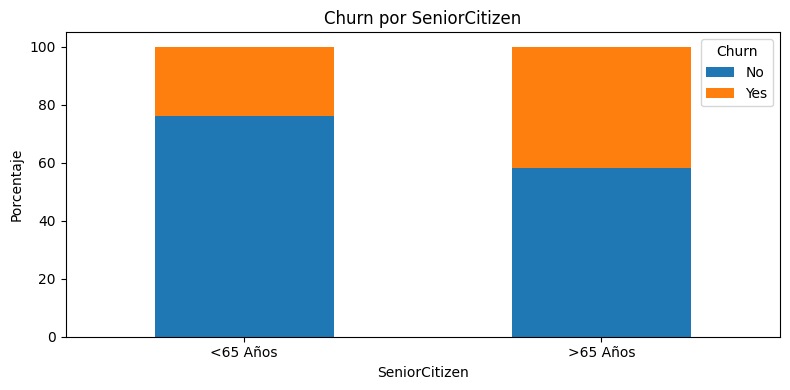

In [61]:
df_senior.index = ['<65 Años','>65 Años']

ax = df_senior.plot(
    kind='bar',
    stacked=True,
    figsize=(8, 4),
    title='Churn por SeniorCitizen',
    ylabel='Porcentaje',
    xlabel='SeniorCitizen'
)
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
plt.tight_layout()


#### Pareja

In [62]:
df_Partner = pd.crosstab(data['customer.Partner'], data['Churn'], normalize='index') * 100
print(f"Clientes sin parejas presentan un porcentaje mayor de Churn: {df_Partner.loc["No","Yes"]:.2f}%")
analisis_patrones += f"Clientes sin pareja presentan un porcentaje mayor de Churn: {df_Partner.loc["No","Yes"]:.2f}%\n"
df_Partner

Clientes sin parejas presentan un porcentaje mayor de Churn: 33.08%


Churn,No,Yes
customer.Partner,,
No,66.922421,33.077579
Yes,80.115537,19.884463


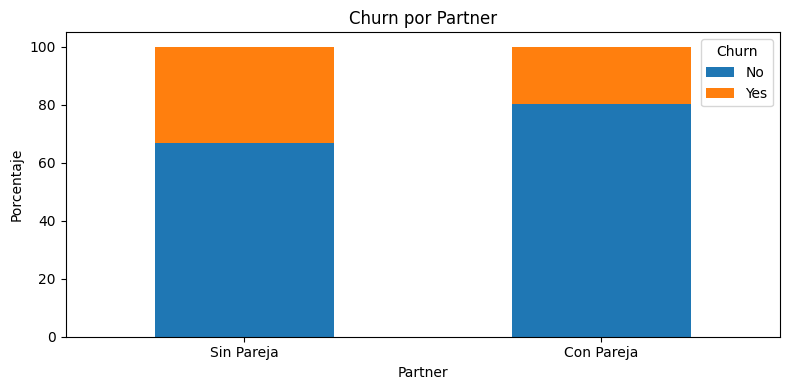

In [63]:
df_Partner.index = ['Sin Pareja','Con Pareja']
ax = df_Partner.plot(
    kind='bar',
    stacked=True,
    figsize=(8,4),
    title='Churn por Partner',
    ylabel='Porcentaje',
    xlabel='Partner'
)
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
plt.tight_layout()

#### Dependientes

In [64]:
df_Dependents = pd.crosstab(data['customer.Dependents'], data['Churn'], normalize='index') * 100
print(f"Clientes sin dependientes presentan un porcentaje mayor de Churn: {df_Dependents.loc["No","Yes"]:.2f}%")
analisis_patrones += f"Clientes sin dependientes presentan un porcentaje mayor de Churn: {df_Dependents.loc["No","Yes"]:.2f}%\n"
df_Dependents

Clientes sin dependientes presentan un porcentaje mayor de Churn: 31.34%


Churn,No,Yes
customer.Dependents,,
No,68.658588,31.341412
Yes,84.272997,15.727003


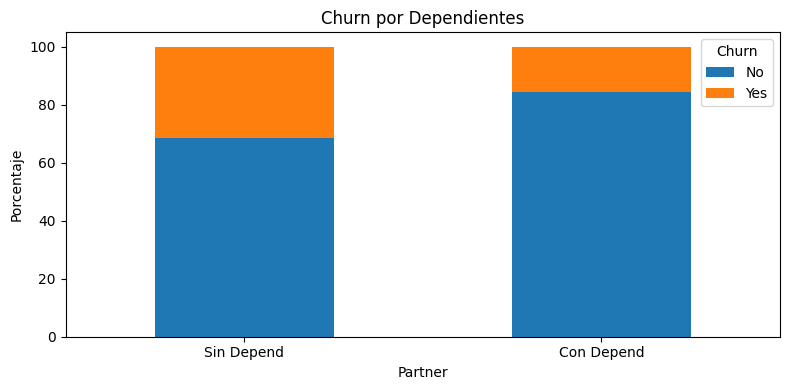

In [65]:
df_Dependents.index = ['Sin Depend','Con Depend']
ax = df_Dependents.plot(
    kind='bar',
    stacked=True,
    figsize=(8,4),
    title='Churn por Dependientes',
    ylabel='Porcentaje',
    xlabel='Partner'
)
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
plt.tight_layout()

#### Antiguedad

In [66]:
df_tenure = pd.crosstab(data['customer.tenure'], data['Churn'], normalize='index') * 100
df_tenure.drop(columns='No',inplace=True)
df_tenure.rename(columns={'Yes':'Churn'},inplace=True)
df_tenure.head(3), df_tenure.tail(3)

(Churn                Churn
 customer.tenure           
 1                62.057336
 2                52.173913
 3                46.391753,
 Churn               Churn
 customer.tenure          
 70               9.401709
 71               3.614458
 72               1.724138)

El Churn presenta una relacion exponencial decreciente con respecto a la antiguedad


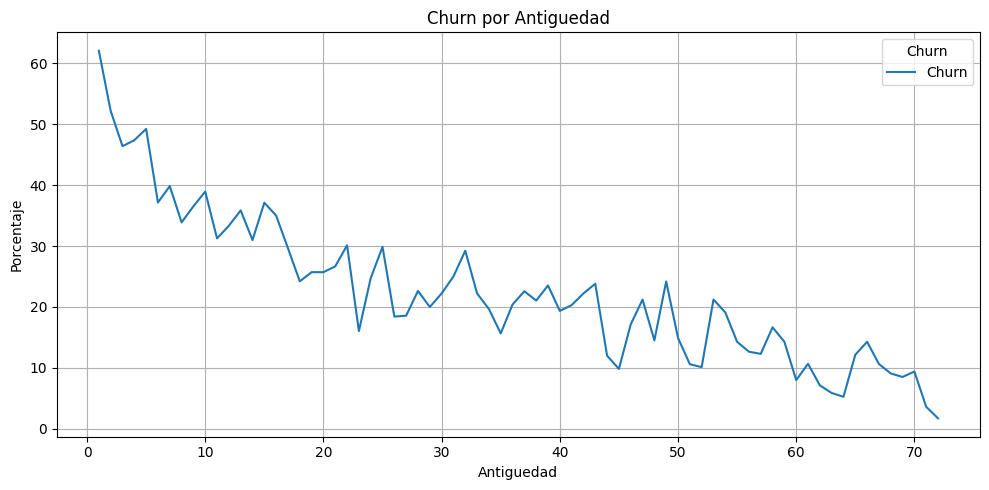

In [67]:
print(f"El Churn presenta una relacion exponencial decreciente con respecto a la antiguedad")
analisis_patrones += "El Churn presenta una relacion exponencial decreciente con respecto a la antiguedad\n"
ax = df_tenure.plot(
    kind='line',
    figsize=(10, 5),
    title='Churn por Antiguedad',
    ylabel='Porcentaje',
    xlabel='Antiguedad',
    grid=True
)
plt.tight_layout()

In [68]:
print(analisis_patrones)

Insights encontrados:
Procentaje de clientes que presentan Churn: 26.70%
Clientes con mas de 65 presentan un porcentaje mayor de Churn: 41.86%
Clientes sin pareja presentan un porcentaje mayor de Churn: 33.08%
Clientes sin dependientes presentan un porcentaje mayor de Churn: 31.34%
El Churn presenta una relacion exponencial decreciente con respecto a la antiguedad



### Info Servicio

In [70]:
servicio = [col for col in data.columns if (col.startswith('internet') or col.startswith('phone'))]
servicio

['phone.PhoneService',
 'phone.MultipleLines',
 'internet.InternetService',
 'internet.OnlineSecurity',
 'internet.OnlineBackup',
 'internet.DeviceProtection',
 'internet.TechSupport',
 'internet.StreamingTV',
 'internet.StreamingMovies']

#### Telefonia

In [72]:
df_PhoneService = pd.crosstab(data['phone.PhoneService'], data['Churn'], normalize='index') * 100
df_PhoneService

Churn,No,Yes
phone.PhoneService,,
No,74.277017,25.722983
Yes,73.191351,26.808649


In [73]:
df_MultipleLines = pd.crosstab(data['phone.MultipleLines'], data['Churn'], normalize='index') * 100
df_MultipleLines

Churn,No,Yes
phone.MultipleLines,,
No,74.931214,25.068786
No phone service,74.277017,25.722983
Yes,71.215278,28.784722


In [76]:
analisis_patrones += "No existe relacion entre el churn y si el cliente tiene servicio de telefonia unica o multiple\n"

#### Internet

In [80]:
df_InternetService = pd.crosstab(data['internet.InternetService'], data['Churn'], normalize='index') * 100
df_InternetService

Churn,No,Yes
internet.InternetService,,
DSL,80.690537,19.309463
Fiber optic,58.009383,41.990617
No,92.422192,7.577808


In [83]:
for option in data['internet.InternetService'].unique():
    print(f"{option}: {data[data['internet.InternetService']==option].shape[0]/data.shape[0]*100:.2f}%")

DSL: 34.46%
Fiber optic: 43.83%
No: 21.71%


In [88]:
uso_fibra_opt = data[data['internet.InternetService']=='Fiber optic'].shape[0]/data.shape[0]*100
analisis_patrones += f"El {uso_fibra_opt:.2f}% de los clientes usa fibra optica, sin embargo este grupo presenta el mayor nivel de Churn {df_InternetService.loc['Fiber optic','Yes']:.2f}%\n"

In [89]:
print(analisis_patrones)

Insights encontrados:
Procentaje de clientes que presentan Churn: 26.70%
Clientes con mas de 65 presentan un porcentaje mayor de Churn: 41.86%
Clientes sin pareja presentan un porcentaje mayor de Churn: 33.08%
Clientes sin dependientes presentan un porcentaje mayor de Churn: 31.34%
El Churn presenta una relacion exponencial decreciente con respecto a la antiguedad
No existe relacion entre el churn y si el cliente tiene PhoneService
No existe relacion entre el churn y si el cliente tiene servicio de telefonia unica o multiple
El 43.83% de los clientes usa fibra optica, sin embargo este grupo presenta el mayor nivel de Churn 41.99%



In [94]:
internet_services = {}
for col in ['internet.OnlineSecurity', 'internet.OnlineBackup', 'internet.DeviceProtection', 'internet.TechSupport', 'internet.StreamingTV','internet.StreamingMovies']:
  internet_services[col] = pd.crosstab(data[col], data['Churn'], normalize='index') * 100

for col,df in internet_services.items():
  print(f"{col}:")
  df.style
  print()

internet.OnlineSecurity:

internet.OnlineBackup:

internet.DeviceProtection:

internet.TechSupport:

internet.StreamingTV:

internet.StreamingMovies:



In [97]:
from IPython.display import display

internet_services = {}

for col in [
    'internet.OnlineSecurity',
    'internet.OnlineBackup',
    'internet.DeviceProtection',
    'internet.TechSupport',
    'internet.StreamingTV',
    'internet.StreamingMovies'
]:
    internet_services[col] = (
        pd.crosstab(data[col], data['Churn'], normalize='index') * 100
    )

for col, df in internet_services.items():
    display(df.style.format("{:.2f}%"))
    print("-----------------------------")


Churn,No,Yes
internet.OnlineSecurity,,
No,58.03%,41.97%
No internet service,92.42%,7.58%
Yes,85.38%,14.62%


-----------------------------


Churn,No,Yes
internet.OnlineBackup,,
No,60.05%,39.95%
No internet service,92.42%,7.58%
Yes,78.15%,21.85%


-----------------------------


Churn,No,Yes
internet.DeviceProtection,,
No,60.72%,39.28%
No internet service,92.42%,7.58%
Yes,77.30%,22.70%


-----------------------------


Churn,No,Yes
internet.TechSupport,,
No,58.26%,41.74%
No internet service,92.42%,7.58%
Yes,84.58%,15.42%


-----------------------------


Churn,No,Yes
internet.StreamingTV,,
No,66.33%,33.67%
No internet service,92.42%,7.58%
Yes,69.71%,30.29%


-----------------------------


Churn,No,Yes
internet.StreamingMovies,,
No,66.10%,33.90%
No internet service,92.42%,7.58%
Yes,69.92%,30.08%


-----------------------------


In [71]:
for col in servicio:
    print(col, data[col].unique())

phone.PhoneService ['Yes' 'No']
phone.MultipleLines ['No' 'Yes' 'No phone service']
internet.InternetService ['DSL' 'Fiber optic' 'No']
internet.OnlineSecurity ['No' 'Yes' 'No internet service']
internet.OnlineBackup ['Yes' 'No' 'No internet service']
internet.DeviceProtection ['No' 'Yes' 'No internet service']
internet.TechSupport ['Yes' 'No' 'No internet service']
internet.StreamingTV ['Yes' 'No' 'No internet service']
internet.StreamingMovies ['No' 'Yes' 'No internet service']


In [90]:
servicio

['phone.PhoneService',
 'phone.MultipleLines',
 'internet.InternetService',
 'internet.OnlineSecurity',
 'internet.OnlineBackup',
 'internet.DeviceProtection',
 'internet.TechSupport',
 'internet.StreamingTV',
 'internet.StreamingMovies']

In [ ]:
# df_tenure = data.groupby('customer.tenure').agg({'Churn':'count'})
# df_tenure

#Separamos tenure para analisis diferente

# data[['Churn','customer.tenure']]


# tabla = data.pivot_table(
#     index="customer.tenure",
#     columns="Churn",
#     values="customer.tenure",
#     aggfunc="count"
# )

# tabla.head()


#df_clinete = data.groupby('customer.gender').agg({'Churn':'count'})
# df_clinete = pd.DataFrame()

# for col in cliente:
#   df_clinete[col] = data.groupby('customer.'+col).agg({'Churn':'count'})

# df_clinete


In [ ]:
#
cuenta = [col for col in data.columns if col.startswith('account')]

## Generar insights accionables para la toma de decisiones

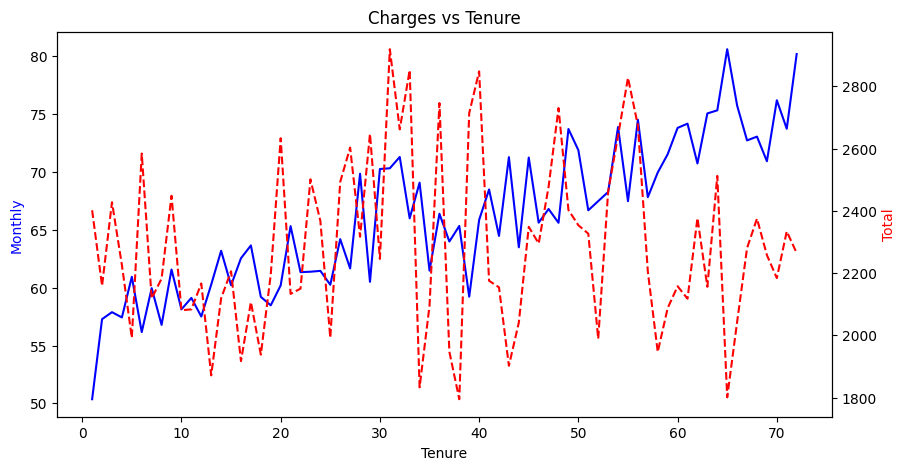

In [49]:
# no parece haber relacion entre
df_tenure_charges =  data.groupby('customer.tenure').agg({'account.Charges.Monthly':'mean','account.Charges.Total':'mean'})

# ax = plt.scatter(df_tenure_charges['account.Charges.Monthly'],df_tenure_charges['account.Charges.Total'])
# plt.xlabel('account.Charges.Monthly')
# plt.ylabel('account.Charges.Total')
# plt.title('account.Charges.Monthly vs account.Charges.Total')
# plt.show()

#-----------------------------------------
# ax = df_tenure_charges.plot(
#     figsize=(10,5),
#     title="Charges promedio vs Tenure",
#     ylabel="Monto",
#     xlabel="Tenure (meses)"
# )

# ax.grid(alpha=0.3)

#----------------------------------------------------

fig, ax1 = plt.subplots(figsize=(10,5))

ax2 = ax1.twinx()

ax1.plot(
    df_tenure_charges.index,
    df_tenure_charges['account.Charges.Monthly'],
    label="Monthly",
    color = 'blue'
)

ax2.plot(
    df_tenure_charges.index,
    df_tenure_charges['account.Charges.Total'],
    linestyle="--",
    label="Total",
    color = 'red'
)

ax1.set_xlabel("Tenure")
ax1.set_ylabel("Monthly",color='blue')
ax2.set_ylabel("Total",color='red')

plt.title("Charges vs Tenure")
plt.show()



## Transformacion


Preparar los datos para futuros modelos de Machine Learning.

Para columnas con múltiples categorías sin orden natural, como PaymentMethod, la opción más adecuada es One-Hot Encoding, ya que evita introducir una relación numérica artificial entre las categorías y permite que el modelo las trate de forma independiente, lo cual es especialmente importante en modelos lineales y basados en distancia; aunque aumenta la dimensionalidad, en este caso no suele ser un problema porque el número de categorías es reducido, por lo que resulta una solución más segura y alineada con buenas prácticas que usar una simple codificación numérica.

In [ ]:

referencias = {'churn':{0:'No',1:'Yes'}}